# Постановка задачі

1. Виконати завдання iз прикладу i отримати файл iз навченою моделлю для розпiзнавання рукописних цифр. В будь якому графiчному редакторi створити файл iз рукописною цифрою i розпiзнати її. Пояснити результат.
2. Спроєктувати i розробити нейронну мережу на основi таких наборiв даних iмплементованих в Keras:
- Cifar10
- FMNIST

Потрiбно розробити архiтектуру нейронної мережi, навчити її на тестових прикладах, i продемонструвати її роботу на кiлькох зображеннях.

Імпортую бібліотеки

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Завдання 1

<h3>Виконати завдання iз прикладу i отримати файл iз навченою моделлю для розпiзнавання рукописних цифр. В будь якому графiчному редакторi створити файл iз рукописною цифрою i розпiзнати її. Пояснити результат.

Завантажую набір даних MNIST

In [37]:
from keras.datasets import mnist

In [38]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [39]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Переглядаю перші 25 зображень з набору даних

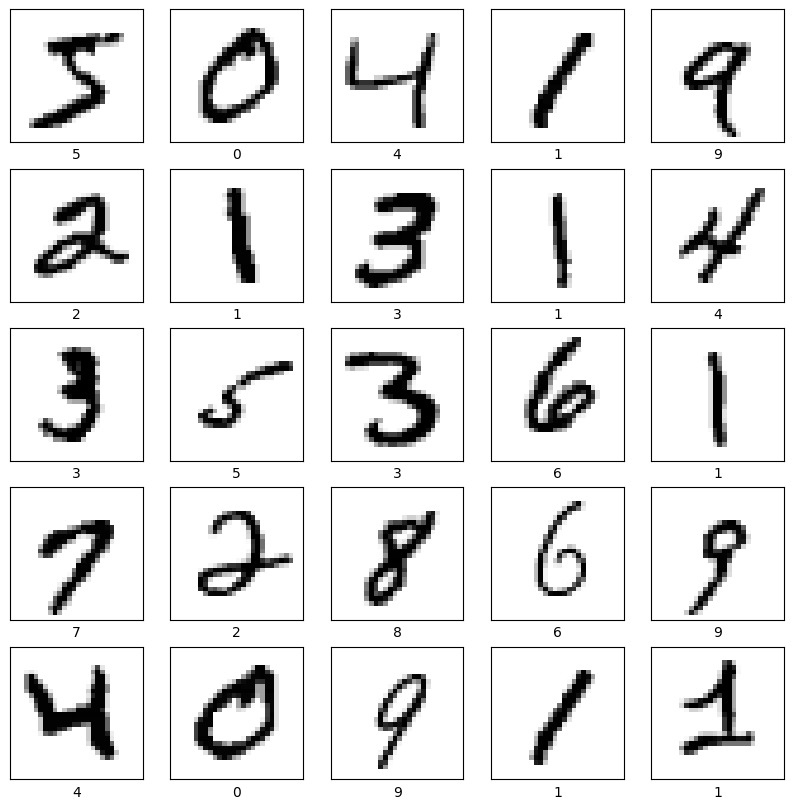

In [40]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

Перетворюю тривимірний масив у двовимірний

In [41]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

Переводжу значення в тип float та номалізую в інтервалі [0, 1]

In [42]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

Перетворюю мітки у формат one-hot encoding

In [43]:
from keras.utils import to_categorical

In [44]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Визначаю тип моделі та шари

In [45]:
from keras import models
from keras import layers

In [46]:
network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

Компілюю мережу

In [47]:
network.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Навчаю модель

In [48]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 11s 19ms/step - loss: 0.2626 - accuracy: 0.9242
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 0.1064 - accuracy: 0.9688
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0711 - accuracy: 0.9789
Epoch 4/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0514 - accuracy: 0.9846
Epoch 5/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0382 - accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0294 - accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0223 - accuracy: 0.9937
Epoch 8/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0171 - accuracy: 0.9949
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0130 - accuracy: 0.9965
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0096 - 

Перевіряю модель на контрольному наборі даних

In [49]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.0645 - accuracy: 0.9820


Зберігаю модель

In [50]:
network.save('my_mnist.h5')

Завантажую попередньо збережену модель

In [51]:
from keras.models import load_model
model = load_model('my_mnist.h5')

Завантажую зображення моєї цифри в OpenCV та нормалізую отриманий масив

In [52]:
import cv2
tst = 255 - cv2.imread('four.png', 0)
tst = cv2.resize(tst, (28, 28))
tst = tst.reshape((1, 28*28))
tst = tst.astype('float32') / 255

Модель визначає значення

In [53]:
pred = list(model.predict(tst)[0])
print(pred.index(max(pred)))

1/1 [==============================] - 0s 55ms/step
4


Протестую ще раз, але з 4 у друкованому вигляді

In [54]:
tst = 255 - cv2.imread('four_printed.png', 0)
tst = cv2.resize(tst, (28, 28))
tst = tst.reshape((1, 28*28))
tst = tst.astype('float32') / 255

In [55]:
pred = list(model.predict(tst)[0])
print(pred.index(max(pred)))

1/1 [==============================] - 0s 22ms/step
4


# Завдання 2

Спроектувати i розробити нейронну мережу на основi таких наборiв даних iмплементованих в Keras:
  1. Cifar10
  2. FMNIST
  
Потрiбно розробити архiтектуру нейронної мережi, навчити її на тестових прикладах, i продемонструвати її роботу на кiлькох зображеннях.

## 1. Cifar10

Завантажую датасет та дані з нього

In [ ]:
from keras.datasets import cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


Переглядаю інформацію про колонки та рядки збережених масивів

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Переформатовую масив міток в одновимірний

In [ ]:
train_labels = train_labels.reshape(-1)
test_labels = test_labels.reshape(-1)
train_labels.shape

(50000,)

Створюю текстові відповідники для міток

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Переглядаю перші 25 зображень з набору даних

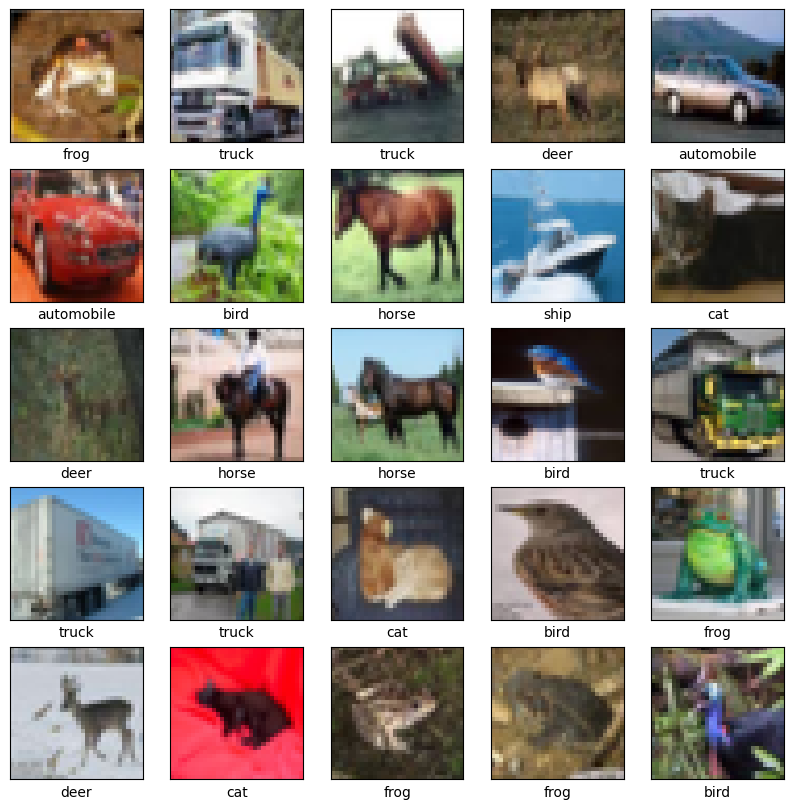

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(labels[train_labels[i]])
plt.show()

Переводжу значення в тип float та номалізую в інтервалі [0, 1]

In [ ]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

Перетворюю мітки у формат one-hot encoding

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Визначаю тип моделі та шари

In [ ]:
network = models.Sequential()

network.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

Компілюю мережу

In [ ]:
network.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Навчаю модель

In [ ]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 54s 136ms/step - loss: 1.7200 - accuracy: 0.3813
Epoch 2/10
391/391 [==============================] - 74s 189ms/step - loss: 1.3095 - accuracy: 0.5381
Epoch 3/10
391/391 [==============================] - 53s 135ms/step - loss: 1.1202 - accuracy: 0.6076
Epoch 4/10
391/391 [==============================] - 52s 133ms/step - loss: 0.9827 - accuracy: 0.6550
Epoch 5/10
391/391 [==============================] - 51s 129ms/step - loss: 0.8834 - accuracy: 0.6911
Epoch 6/10
391/391 [==============================] - 53s 135ms/step - loss: 0.7928 - accuracy: 0.7251
Epoch 7/10
391/391 [==============================] - 53s 136ms/step - loss: 0.7089 - accuracy: 0.7537
Epoch 8/10
391/391 [==============================] - 51s 131ms/step - loss: 0.6367 - accuracy: 0.7797
Epoch 9/10
391/391 [==============================] - 53s 135ms/step - loss: 0.5627 - accuracy: 0.8048
Epoch 10/10
391/391 [==============================] - 53s 135ms/step - l

Перевіряю модель на контрольному наборі даних

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 14ms/step - loss: 1.0368 - accuracy: 0.6760


Зберігаю модель

In [ ]:
network.save('my_cifar.h5')

Завантажую попередньо збережену модель

In [58]:
model = load_model('my_cifar.h5')

Завантажую моє зображення кота в OpenCV та нормалізую отриманий масив

In [59]:
tst = cv2.imread('airplane.png')
tst = cv2.resize(tst, (32, 32))
tst = tst.astype('float32') / 255
tst = np.expand_dims(tst, axis=0)

Модель визначає значення

In [60]:
pred = model.predict(tst)
pred = pred[0]
print(labels[np.argmax(pred)])

1/1 [==============================] - 0s 83ms/step
airplane


Протестую ще на кількох значеннях

In [66]:
# Зображення першого кота
tst_cat = cv2.imread('cat.png')
tst_cat = cv2.resize(tst_cat, (32, 32))
tst_cat = tst_cat.astype('float32') / 255
tst_cat = np.expand_dims(tst_cat, axis=0)

# Зображення другого кота
tst_cat2 = cv2.imread('cat2.png')
tst_cat2 = cv2.resize(tst_cat2, (32, 32))
tst_cat2 = tst_cat2.astype('float32') / 255
tst_cat2 = np.expand_dims(tst_cat2, axis=0)

# Зображення третього кота
tst_cat3 = cv2.imread('cat3.png')
tst_cat3 = cv2.resize(tst_cat3, (32, 32))
tst_cat3 = tst_cat3.astype('float32') / 255
tst_cat3 = np.expand_dims(tst_cat3, axis=0)

# Зображення третього вантажівки
tst_truck = cv2.imread('truck.jpg')
tst_truck = cv2.resize(tst_truck, (32, 32))
tst_truck = tst_truck.astype('float32') / 255
tst_truck = np.expand_dims(tst_truck, axis=0)

In [62]:
pred_cat = model.predict(tst_cat)
pred_cat = pred_cat[0]
print(labels[np.argmax(pred_cat)])

1/1 [==============================] - 0s 22ms/step
airplane


In [63]:
pred_cat2 = model.predict(tst_cat2)
pred_cat2 = pred_cat2[0]
print(labels[np.argmax(pred_cat2)])

1/1 [==============================] - 0s 21ms/step
horse


In [64]:
pred_cat3 = model.predict(tst_cat3)
pred_cat3 = pred_cat3[0]
print(labels[np.argmax(pred_cat3)])

1/1 [==============================] - 0s 23ms/step
truck


In [67]:
pred_truck = model.predict(tst_truck)
pred_truck = pred_truck[0]
print(labels[np.argmax(pred_truck)])

1/1 [==============================] - 0s 22ms/step
truck


## 2. FMNIST

Завантажую датасет та дані з нього

In [73]:
from keras.datasets import fashion_mnist

In [76]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Переглядаю інформацію про колонки та рядки збережених масивів

In [77]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Створюю текстові відповідники для міток

In [78]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Переглядаю перші 25 зображень з набору даних

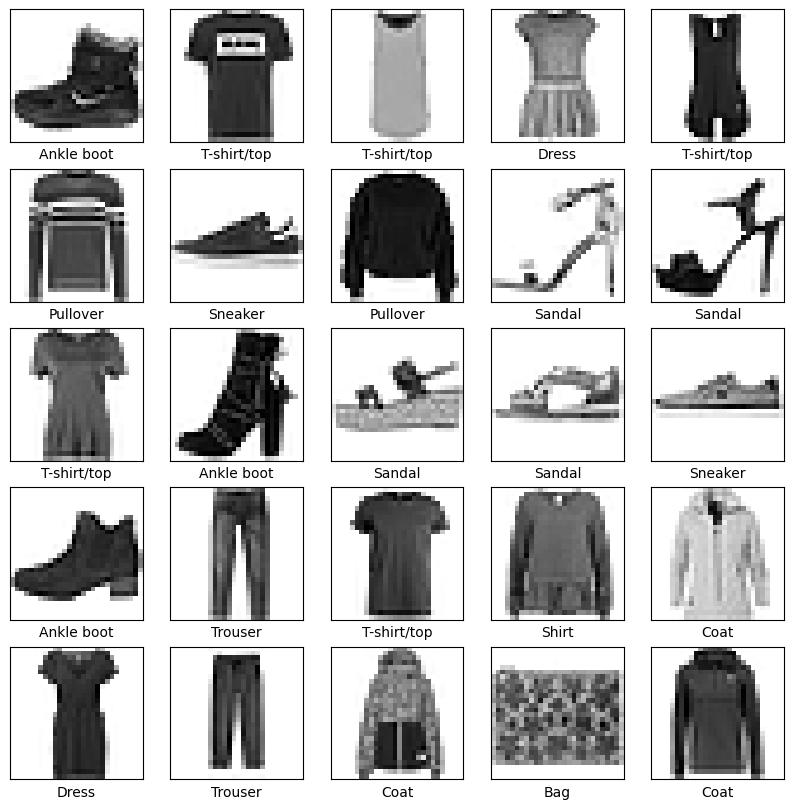

In [79]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(labels[train_labels[i]])
plt.show()

Перетворюю форму зображень та переводжу значення в тип float та номалізую в інтервалі [0, 1]

In [80]:
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

Перетворюю мітки у формат one-hot encoding

In [81]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Визначаю тип моделі та шари

In [82]:
network = models.Sequential()

network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

Компілюю мережу

In [83]:
network.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Навчаю модель

In [84]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 58s 122ms/step - loss: 0.6034 - accuracy: 0.7769
Epoch 2/10
469/469 [==============================] - 43s 92ms/step - loss: 0.3692 - accuracy: 0.8640
Epoch 3/10
469/469 [==============================] - 42s 91ms/step - loss: 0.3087 - accuracy: 0.8861
Epoch 4/10
469/469 [==============================] - 43s 93ms/step - loss: 0.2720 - accuracy: 0.8992
Epoch 5/10
469/469 [==============================] - 42s 90ms/step - loss: 0.2460 - accuracy: 0.9085
Epoch 6/10
469/469 [==============================] - 43s 91ms/step - loss: 0.2227 - accuracy: 0.9168
Epoch 7/10
469/469 [==============================] - 43s 91ms/step - loss: 0.2040 - accuracy: 0.9243
Epoch 8/10
469/469 [==============================] - 43s 92ms/step - loss: 0.1859 - accuracy: 0.9309
Epoch 9/10
469/469 [==============================] - 43s 91ms/step - loss: 0.1711 - accuracy: 0.9363
Epoch 10/10
469/469 [==============================] - 42s 90ms/step - loss: 0.15

Перевіряю модель на контрольному наборі даних

In [85]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.2562 - accuracy: 0.9099


Зберігаю модель

In [86]:
network.save('my_fmnist.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Завантажую попередньо збережену модель

In [87]:
model2 = load_model('my_fmnist.h5')

Завантажую моє зображення кота в OpenCV та нормалізую отриманий масив

In [88]:
tst_bag = cv2.imread('bag.png', cv2.IMREAD_GRAYSCALE)
tst_bag = cv2.resize(tst_bag, (28, 28))
tst_bag = tst_bag.astype('float32') / 255
tst_bag = np.expand_dims(tst_bag, axis=-1)
tst_bag = np.expand_dims(tst_bag, axis=0)

Модель визначає значення

In [89]:
pred_bag = model2.predict(tst_bag)
pred_bag = pred_bag[0]
print(labels[np.argmax(pred_bag)])

1/1 [==============================] - 0s 85ms/step
Bag


Тепер протестую ще на кількох зображеннях

In [96]:
# Зображення футболки
tst_t = cv2.imread('tshirt.png', cv2.IMREAD_GRAYSCALE)
tst_t = cv2.resize(tst_t, (28, 28))
tst_t = tst_t.astype('float32') / 255
tst_t = np.expand_dims(tst_t, axis=-1)
tst_t = np.expand_dims(tst_t, axis=0)

# Зображення пальто
tst_coat = cv2.imread('coat.jpg', cv2.IMREAD_GRAYSCALE)
tst_coat = cv2.resize(tst_coat, (28, 28))
tst_coat = tst_coat.astype('float32') / 255
tst_coat = np.expand_dims(tst_coat, axis=-1)
tst_coat = np.expand_dims(tst_coat, axis=0)

# Зображення плаття
tst_dress = cv2.imread('dress.jpg', cv2.IMREAD_GRAYSCALE)
tst_dress = cv2.resize(tst_dress, (28, 28))
tst_dress = tst_dress.astype('float32') / 255
tst_dress = np.expand_dims(tst_dress, axis=-1)
tst_dress = np.expand_dims(tst_dress, axis=0)

# Зображення штанів
tst_tr = cv2.imread('trouser.png', cv2.IMREAD_GRAYSCALE)
tst_tr = cv2.resize(tst_tr, (28, 28))
tst_tr = tst_tr.astype('float32') / 255
tst_tr = np.expand_dims(tst_tr, axis=-1)
tst_tr = np.expand_dims(tst_tr, axis=0)

In [91]:
pred_t = model2.predict(tst_t)
pred_t = pred_t[0]
print(labels[np.argmax(pred_t)])

1/1 [==============================] - 0s 22ms/step
Shirt


In [92]:
pred_coat = model2.predict(tst_coat)
pred_coat = pred_coat[0]
print(labels[np.argmax(pred_coat)])

1/1 [==============================] - 0s 26ms/step
Bag


In [95]:
pred_dress = model2.predict(tst_dress)
pred_dress = pred_dress[0]
print(labels[np.argmax(pred_dress)])

1/1 [==============================] - 0s 37ms/step
T-shirt/top


In [97]:
pred_tr = model2.predict(tst_tr)
pred_tr = pred_tr[0]
print(labels[np.argmax(pred_tr)])

1/1 [==============================] - 0s 24ms/step
Trouser


# Висновок

У цій роботі я навчився працювати з фреймворком Keras, завантажувати вбудовані набори та готувати їх до роботи з мережею, створювати архітектуру моделі, компілювати мережу, навчати можель тестувати її, зберігати та використовувати на власних прикладах.